In [1]:
import numpy as np
from sklearn import decomposition
import csv
import pandas as pd

In [2]:
data = pd.read_csv('TCGA_test.csv')
cols = data.columns.tolist()

label = data[data.columns[-1]]
feature = data.drop(data.columns[-1], axis = 1)

print(type(data))
print(label.head())

print(feature.__class__)
print(label.__class__)

feature = np.array(feature)
labels = np.array(label)

print(feature.__class__)
print(label.__class__)

<class 'pandas.core.frame.DataFrame'>
0    4
1    2
2    0
3    3
4    0
Name: 4, dtype: int64
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>


In [3]:
feat_cols = [ 'type'+str(i) for i in range(feature.shape[1]) ]

In [4]:
df = pd.DataFrame(feature, columns = feat_cols)

In [5]:
print(df.head())

   type0     type1     type2     type3     type4  type5     type6     type7  \
0    0.0  2.841933  3.697852  6.886831  9.715828    0.0  8.497201  0.000000   
1    0.0  0.846874  2.099396  6.240230  8.704281    0.0  6.174770  0.000000   
2    0.0  3.446865  2.806633  6.140599  9.718868    0.0  8.407336  0.000000   
3    0.0  4.714185  4.007088  7.004187  9.384346    0.0  7.182861  0.000000   
4    0.0  2.930624  2.358818  6.782133  9.831291    0.0  6.900951  0.516217   

   type8  type9    ...      type20521  type20522  type20523  type20524  \
0    0.0    0.0    ...       4.353507   7.976192  10.492905   3.991499   
1    0.0    0.0    ...       7.222872   9.130573  10.405099   3.266292   
2    0.0    0.0    ...       5.687341   9.048819  10.282127   5.111403   
3    0.0    0.0    ...       6.577701   8.842655  10.574243   5.156097   
4    0.0    0.0    ...       6.553256   9.305825   9.826857   7.235478   

   type20525  type20526  type20527  type20528  type20529  type20530  
0   9.5157

In [6]:
df['label'] = label
df['label'] = df['label'].apply(lambda i: str(i))

In [7]:
feature, label = None, None
print('Size of the dataframe: {}'.format(df.shape))

Size of the dataframe: (200, 20532)


In [8]:
rndperm = np.random.permutation(df.shape[0])

In [9]:
from sklearn.decomposition import PCA

In [10]:
pca = PCA(n_components = 2)
pca_result = pca.fit_transform(df[feat_cols].values)

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.15300984 0.10480392]


In [11]:
df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 

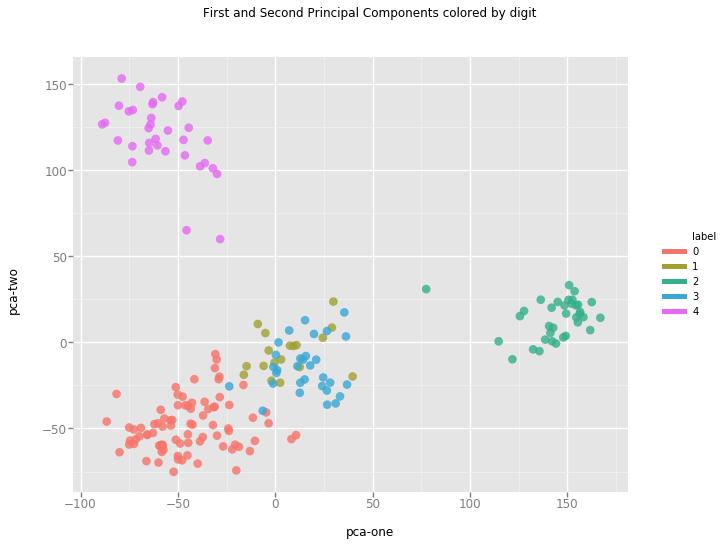

<ggplot: (-9223372036841469678)>

In [13]:
from ggplot import *

chart = ggplot( df.loc[rndperm[:3000],:], aes(x = 'pca-one', y = 'pca-two', color='label') ) \
        + geom_point(size=75,alpha=0.8) \
        + ggtitle("First and Second Principal Components colored by digit")
chart